<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Deep_Learning_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

#Loading Dataset

Connecting the colab notebook to Google Drive to get the access to Logo3 folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_dir = "/content/drive/MyDrive/logos3"

In [ ]:
import os

print(os.listdir(dataset_dir))  # should show subfolders like train/ and val/

['test', 'train']


Once the connection is established the folders "train" and "test" are checked throught the code.

In [ ]:
train_dir = os.path.join(dataset_dir, "train")
test_dir  = os.path.join(dataset_dir, "test")

#Spliting Data

In [ ]:
img_size = (224, 224)  # standard for VGG16
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset="training",
    class_mode="categorical"
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

num_classes = len(train_gen.class_indices)
print("Classes:", train_gen.class_indices)

Found 1839 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Classes: {'test': 0, 'train': 1}


#Pretrained Model

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation="softmax")(x) # Use num_classes from the data generator

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint, earlystop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6990 - loss: 0.7276
Epoch 1: val_accuracy improved from -inf to 0.78867, saving model to best_model.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 680s 12s/step - accuracy: 0.6998 - loss: 0.7252 - val_accuracy: 0.7887 - val_loss: 0.3748
Epoch 2/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8455 - loss: 0.3807
Epoch 2: val_accuracy improved from 0.78867 to 0.80828, saving model to best_model.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.8453 - loss: 0.3809 - val_accuracy: 0.8083 - val_loss: 0.3393
Epoch 3/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.8769 - loss: 0.3136
Epoch 3: val_accuracy improved from 0.80828 to 0.88453, saving model to best_model.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.8768 - loss: 0.3137 - val_accuracy: 0.8845 - val_loss: 0.2892
Epoch 4/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8667 - loss: 0.3012
Epoch 4: val_accuracy did not improve from 0.88453
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.8667 - loss: 0.3010 - val_accuracy: 0.8301 - val_loss: 0.3263
Epoch 5/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.8928 - loss: 0.2670
Epoch 5: val_accuracy did not improve from 0.88453
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.8927 - loss: 0.2671 - val_accuracy: 0.8671 - val_loss: 0.2887
Epoch 6/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9126 - loss: 0.2420
Epoch 6: val_accuracy did not improve from 0.88453
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.9124 - loss: 0.2420 - val_accuracy: 0.8519 - val_loss: 0.2880
Epoch 7/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9024 - loss: 0.2141
Epoch 7: val_accuracy did not i

58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.9285 - loss: 0.1590 - val_accuracy: 0.8954 - val_loss: 0.2708
Epoch 12/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9376 - loss: 0.1470
Epoch 12: val_accuracy did not improve from 0.89542
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.9374 - loss: 0.1476 - val_accuracy: 0.8824 - val_loss: 0.2891
Epoch 13/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9418 - loss: 0.1506
Epoch 13: val_accuracy did not improve from 0.89542
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.9418 - loss: 0.1505 - val_accuracy: 0.8780 - val_loss: 0.2744
Epoch 14/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9239 - loss: 0.1601
Epoch 14: val_accuracy did not improve from 0.89542
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.9240 - loss: 0.1599 - val_accuracy: 0.8388 - val_loss: 0.3684
Epoch 15/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9404 - loss: 0.1372
Epoch 15: val_accuracy d

#Model Evaluation

In [ ]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy (Frozen Base): {val_acc:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8890 - loss: 0.2794
Validation Accuracy (Frozen Base): 0.8954


#Model Fine Tuning

In [ ]:
for layer in base_model.layers[-4:]:  # unfreeze last 4 conv layers
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # smaller LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[checkpoint, earlystop]
)

# ============================================
# 8. Evaluate Fine-tuned Model
# ============================================

val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy (Fine-tuned): {val_acc:.4f}")

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9449 - loss: 0.1361
Epoch 1: val_accuracy did not improve from 0.89542
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 315ms/step - accuracy: 0.9448 - loss: 0.1362 - val_accuracy: 0.8802 - val_loss: 0.3442
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9568 - loss: 0.1118
Epoch 2: val_accuracy did not improve from 0.89542
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 247ms/step - accuracy: 0.9566 - loss: 0.1120 - val_accuracy: 0.8867 - val_loss: 0.3004
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9596 - loss: 0.0999
Epoch 3: val_accuracy did not improve from 0.89542
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - accuracy: 0.9596 - loss: 0.1000 - val_accuracy: 0.8627 - val_loss: 0.4013
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9618 - loss: 0.0915
Epoch 4: val_accuracy did not improve from 0.89542
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 238ms/step - accuracy: 0.9617 - loss: 0.0916 - val_accuracy: 0.8867

#Plots for Trained Curves

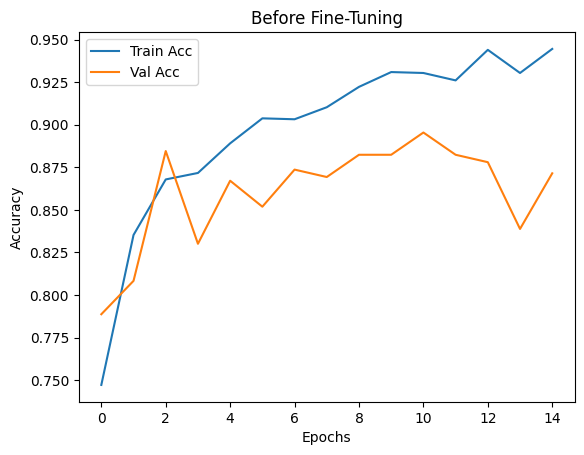

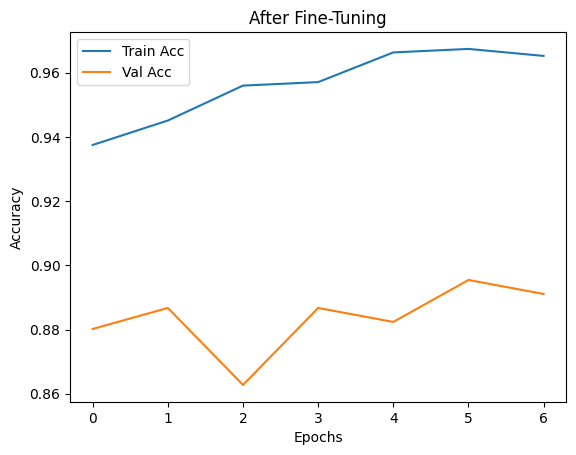

In [ ]:
def plot_history(history, title="Training History"):
    plt.plot(history.history['accuracy'], label="Train Acc")
    plt.plot(history.history['val_accuracy'], label="Val Acc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_history(history, "Before Fine-Tuning")
plot_history(history_ft, "After Fine-Tuning")

#Classification Report

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step


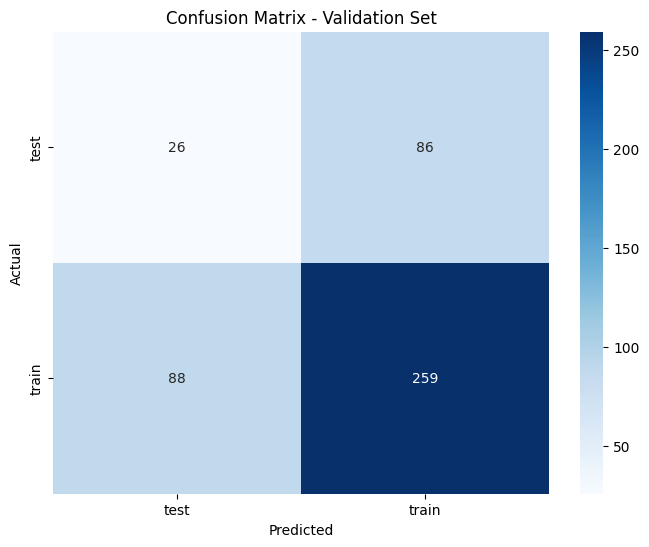

Classification Report:

              precision    recall  f1-score   support

        test       0.23      0.23      0.23       112
       train       0.75      0.75      0.75       347

    accuracy                           0.62       459
   macro avg       0.49      0.49      0.49       459
weighted avg       0.62      0.62      0.62       459



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# ============================================
# Predictions on Validation Data
# ============================================

# Predict class probabilities
y_pred_probs = model.predict(val_gen, verbose=1)

# Convert to predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# ============================================
# Confusion Matrix
# ============================================

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ============================================
# Classification Report
# ============================================

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))